<a href="https://colab.research.google.com/github/evgeny-kolonsky/Lab4/blob/main/Hall/Hall_measurements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab4 Hall effect measurements

Evgeny Kolonsky 2025

v.0.1.2


In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.interpolate import interp1d

In [125]:
# Constants
d = 1e-3 # thikness, m
L = 16e-3 # length between ohmic contacts, m
W = 10e-3 # width, m

$$
R_H = \frac{U_H d}{I B} = \frac{1}{n q}
$$

## Sample 12

on a set fixed and repaired - #270000042898

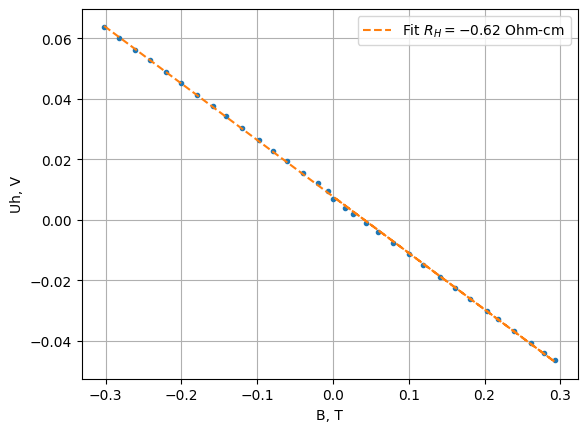

In [126]:
# Resistance
R1 = 39 # Ohm - horizontal
R2 = 44 # Ohm - vertical
# part 2 Hall voltage as a function of a magnetic field
Ip = 30e-3 #A
Uh_max = 32 # mV
Uh_min = 8.5 # mV - can not zero as required at 2.3
# hall probe - "FACE" to observer
# V = 7V
# I - chnaging from max to min
data ='''
#B/mT, Uh/mV
-302 63.7
-282 60.2
-261 56.3
-241 52.8
-220 49.0
-200 45.3
-179 41.4
-158 37.5
-141 34.2
-120 30.4
-98 26.3
-79 22.8
-60 19.4
-39 15.5
-20 12.07
-7 9.62
# change polarity
###
293 -46.43
279 -43.93
261 -40.68
239 -36.66
218 -32.9
203 -30.09
181 -26.09
161 -22.54
141 -18.80
119 -14.82
100 -11.34
79 -07.64
60 -4.11
43 -0.98
27 1.94
16 04.01
0 6.83
'''
B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.2f}$ Ohm-cm')
plt.legend()

## Sample 11

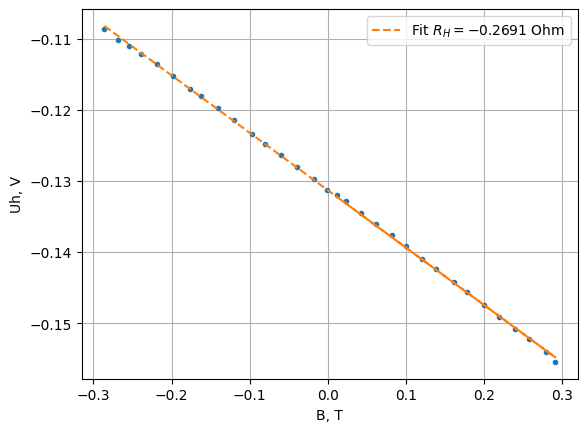

In [127]:
R1 = 63
R2 = 39
Ip = 30e-3 #mA
Uh_max = -125 #mV
Uh_min = -145 # mV - not possible to make zero
data = '''
# B/mT Uh/mV
-286 -108.7
-268 -110.21
-254 -111.10
-239 -112.15
-219 -113.6
-198 -115.24
-176 -117.07
-162 -118.09
-141 -119.73
-120 -121.44
-097 -123.40
-80 -124.78
-60 -126.42
-40 -128.05
-18 -129.8
-1 -131.29
# change polarity
291 -155.45
279 -154.11
257 -152.24
239 -150.83
219 -149.07
200 -147.50
178 -145.68
161 -144.20
139 -142.40
120 -140.96
100 -139.22
82 -137.66
62 -136.04
43 -134.48
23 -132.89
12 -131.95
'''


B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()


## sample 14

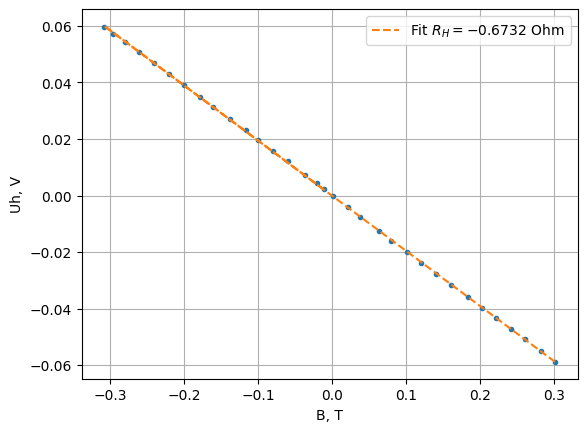

In [128]:
R1 = 40
R2 = 45
Ip = 29e-3 #mA
Uh_min, Uh_max = -3, 19 # mV
data = '''
# B, V
301 -58.76
282 -55.14
260 -50.88
241 -47.30
221 -43.43
202 -39.79
183 -36.06
160 -31.58
140 -27.67
120 -23.77
101 -19.88
80 -15.98
63 -12.49
38 -07.53
21 -04.19
1 -0.32
# polarity
-308 59.49
-296 57.14
-280 54.27
-261 50.65
-241 46.78
-221 43.02
-200 38.99
-179 34.95
-161 31.48
-138 27.14
-117 23.03
-100 19.74
-80 15.69
-60 12.25
-37 07.40
-20 04.31
-11 02.34
'''



B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()

## Sample 24

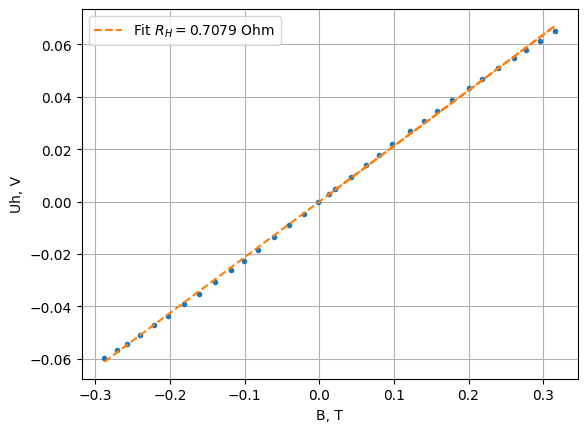

In [129]:
R1 = 53
R2 = 51
Uh_min, Uh_max = -14, 10 # mV
Ip = 30e-3
data = '''
# B/mT, V/mV
-288 -59.73
-271 -56.53
-258 -54.19
-240 -50.83
-221 -47.15
-202 -43.53
-181 -39.20
-161 -35.11
-140 -30.64
-118 -26.19
-101 -22.50
-82 -18.34
-60 -13.53
-40 -09.02
-20 -4.74
-1 -0.27
#
316 65.32
296 61.47
277 58.02
261 55.01
240 51.09
218 46.91
200 43.28
178 38.85
158 34.62
141 30.96
122 26.97
98 21.85
80 17.88
63 14.02
42 9.30
21 04.76
13 2.82
'''


B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()

## Sample 13


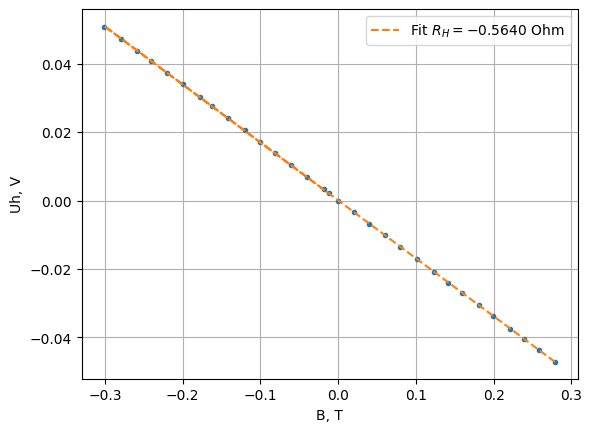

In [130]:
R1 = 36
R2 = 34
Ip = 30e-3
Uh_min, Uh_max = -8.5, 8.5
data = '''
# B, U
279 -47.04
259 -43.79
239 -40.35
221 -37.45
199 -33.69
181 -30.64
159 -26.89
142 -23.98
123 -20.74
101 -17.06
80 -13.62
60 -10.15
40 -6.81
20 -3.33
0 0.01
#
-301 50.68
-279 47.06
-259 43.79
-240 40.68
-220 37.29
-200 33.92
-178 30.23
-162 27.55
-141 24.03
-120 20.58
-100 17.15
-81 13.95
-60 10.48
-40 07.01
-18 03.30
-12 02.24
'''


B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()

## Sample 21


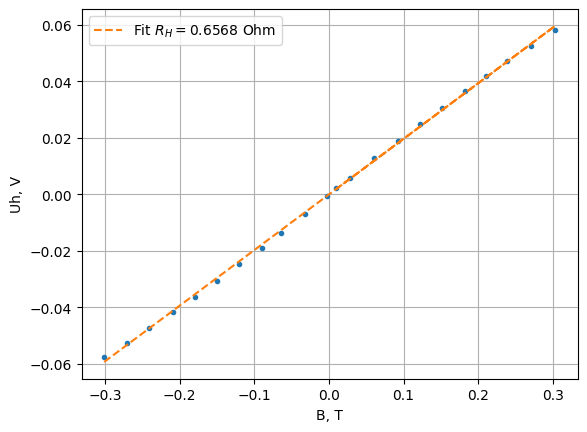

In [131]:
R1, R2 = 47, 56
Ip = 30e-3
Uh_min, Uh_max = -5, 23 # mV
data = '''
# B, U
-301 -57.61
-271 -52.58
-241 -47.39
-209 -41.77
-180 -36.34
-150 -30.66
-120 -24.79
-90 -18.85
-64 -13.56
-32 -6.83
-2 -0.55
#
303 58.13
271 52.63
239 47.13
210 41.91
182 36.68
151 30.71
122 25.03
92 19.04
61 12.73
28 05.95
10 02.22
'''


B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()

## Sample 22


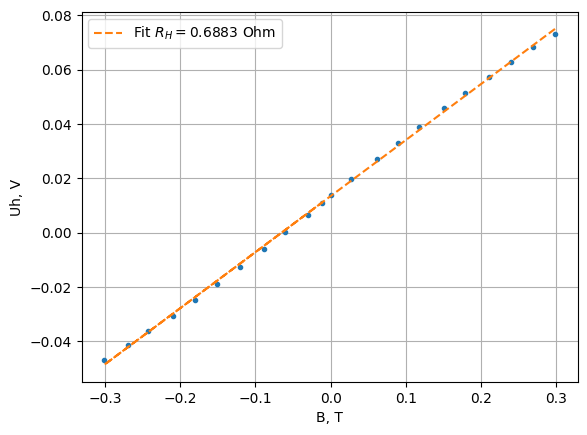

In [132]:
R1, R2 = 47, 54
Uh_min, Uh_max = 14, 40 # mV\
data = '''
# B, V
298 73.19
269 68.17
240 62.96
210 57.37
178 51.23
151 45.80
117 38.83
89 32.83
61 26.94
27 19.56
1 13.80
#
-301 -46.80
-269 -41.30
-242 -36.32
-210 -30.55
-180 -24.71
-151 -18.91
-120 -12.63
-89 -6.00
-60 0.07
-30 6.53
-11 10.78
'''


B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()

## Sample 23


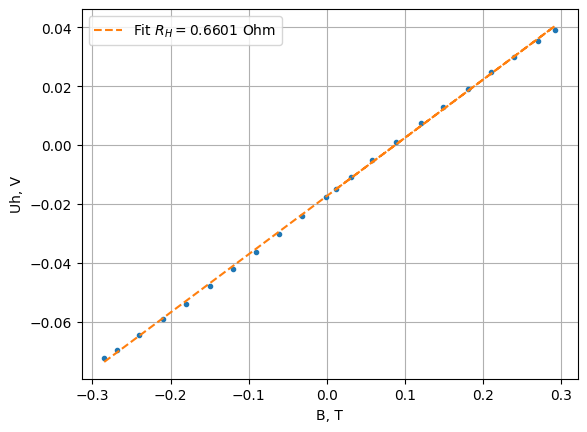

In [133]:
R1, r2 = 46, 50 # Ohm
Ip = 30e-3 # A
Uh_min, Uh_max = -40, -17 # mV
data = '''
# B, Uh
-285 -72.47
-269 -69.64
-240 -64.61
-210 -59.29
-180 -53.88
-150 -47.93
-120 -42.16
-91 -36.29
-61 -30.10
-32 -24.04
-1 -17.62
#
292 39.18
270 35.35
240 30.11
210 24.75
180 19.21
148 12.97
120 7.46
89 1.17
58 -5.22
31 -10.74
11 -14.85
'''


B, Uh = np.genfromtxt(data.splitlines()).T
B  *=1e-3 # mT -> T
Uh *=1e-3 # mV -> V
plt.plot(B, Uh, '.')
plt.xlabel('B, T')
plt.ylabel('Uh, V')
plt.grid()

fit = linregress(B, Uh)
RH = fit.slope * d / Ip
plt.plot(B, fit.intercept + fit.slope *B, '--', label=rf'Fit $R_H ={RH*1e2:.4f}$ Ohm')
plt.legend()

# Part 5: Hall voltage as a function of temperature

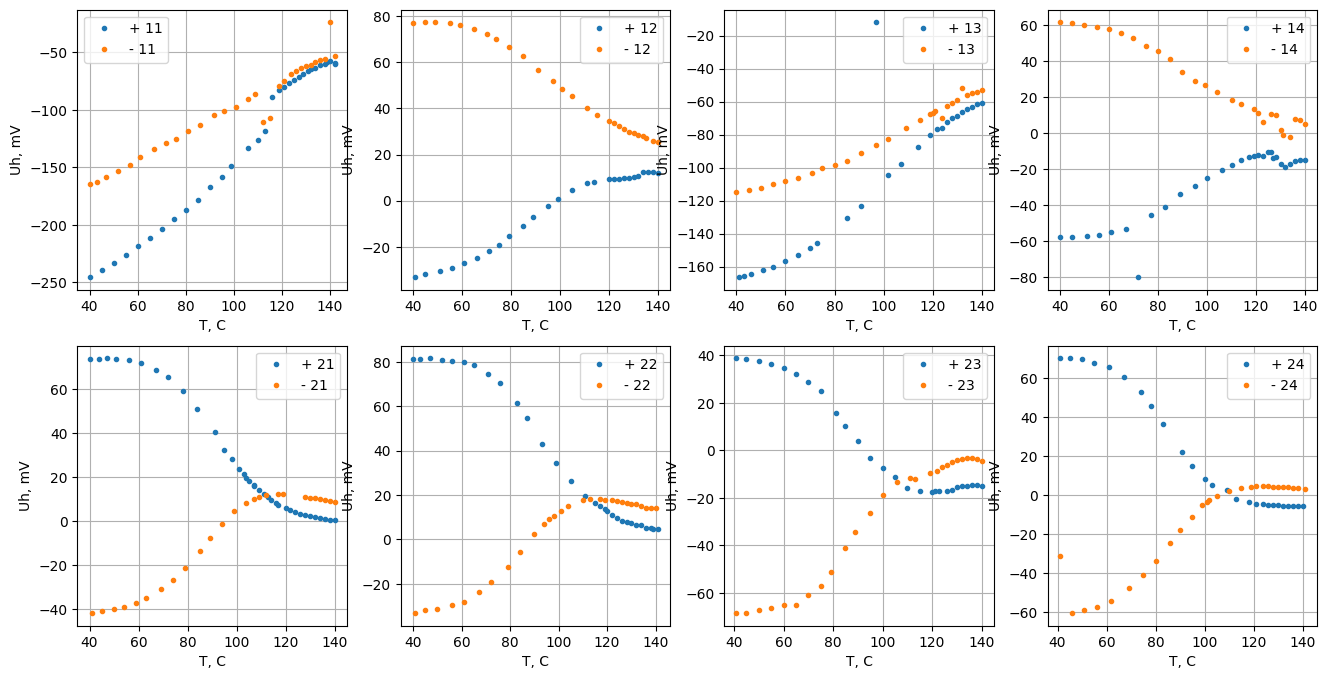

In [134]:
import requests

names = [11, 12, 13, 14, 21, 22, 23, 24]

fig, ax = plt.subplots(2, 4, figsize=(16, 8))

for name in names:
  url = f'https://raw.githubusercontent.com/tphlabs/data/refs/heads/main/Lab4_Hall/{name}.txt'
  response = requests.get(url)
  T, Uh = np.loadtxt(response.text.splitlines()).T
  #T += 273.15 # K
  # find where polarity changed
  ix = np.argmin(np.diff(T) <=0) + 1
  # split
  T1 = T[:ix]
  T2 = T[ix:]
  Uh1 = Uh[:ix]
  Uh2 = Uh[ix:]

  #Tdense = np.linspace(T.min(), T.max(), 100)
  #f1 = interp1d(T1, Uh1, fill_value='extrapolate')
  #f2 = interp1d(T2, Uh2, fill_value='extrapolate')
  #dU = f2(Tdense) - f1(Tdense)
  #plt.plot(1/Tdense, np.log(dU/np.max(dU)))
  first_digit = name % 10
  second_digit = name // 10
  axx = ax[second_digit-1, first_digit-1]
  axx.plot(T1, Uh1, '.', label=f'+ {name}')
  axx.plot(T2, Uh2, '.', label=f'- {name}')

  axx.set_xlabel('T, C')
  axx.set_ylabel('Uh, mV')
  axx.legend()
  axx.grid()
